# Merge sensor data with MET lables

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


os.chdir("/home/cernerrood246/University/DataMining")
pd.set_option("display.precision", 2)

In [8]:
participants_list = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17']

## Load Datasets

### Load MET

In [9]:
MET_all_list = [pd.read_pickle(f"preprocessed_dataset/{participant}/MET.pkl") for participant in participants_list]
MET_all_list[0]


,Time[s],Delta_Time,MET
Time,,,
2021-12-03 16:58:51,1.0,0 days 00:00:00,1.31
2021-12-03 16:58:52,2.0,0 days 00:00:01,1.31
2021-12-03 16:58:53,3.0,0 days 00:00:02,1.52
2021-12-03 16:58:54,4.0,0 days 00:00:03,1.63
2021-12-03 16:58:55,5.0,0 days 00:00:04,1.56
...,...,...,...
2021-12-03 17:28:48,1798.0,0 days 00:29:57,5.32
2021-12-03 17:28:49,1799.0,0 days 00:29:58,5.11
2021-12-03 17:28:50,1800.0,0 days 00:29:59,4.46


### Load Fitbit

In [10]:
fitbit_path = "Fitbit_data/average_data_5S_new/average_data_5S_new"
fitbit_df_list = []
for df in os.listdir(fitbit_path):
    temp_df = pd.read_csv(f"{fitbit_path}/{df}")
    #convert index to datetime
    temp_df = temp_df.rename(columns={"Unnamed: 0": "Time"})
    temp_df["Time"] = pd.to_datetime(temp_df["Time"])

    temp_df = temp_df.set_index("Time")
    #upsample to 1 second without filling
    temp_df = temp_df.resample("1S").asfreq().copy()

    #fill next 4 values with the previous value
    temp_df = temp_df.ffill(limit=4)
    temp_df = temp_df[temp_df['value__bpm'].notna()]

    
    fitbit_df_list.append(temp_df)
    
fitbit_df_all = pd.concat(fitbit_df_list, axis=0)
fitbit_df_all 


,value__bpm,value__confidence
Time,,
2021-11-20 09:11:40,104.0,0.0
2021-11-20 09:11:41,104.0,0.0
2021-11-20 09:11:42,104.0,0.0
2021-11-20 09:11:43,104.0,0.0
2021-11-20 09:11:44,104.0,0.0
...,...,...
2021-11-19 22:49:20,111.0,2.0
2021-11-19 22:49:21,111.0,2.0
2021-11-19 22:49:22,111.0,2.0


## Merge Datasets

### Fitbit

In [11]:
fitbit_merged_df_list = []
for met_df in MET_all_list:
    #left join on met_df
    temp_df = met_df.merge(fitbit_df_all, how="left", left_index=True, right_index=True)
    fitbit_merged_df_list.append(temp_df)

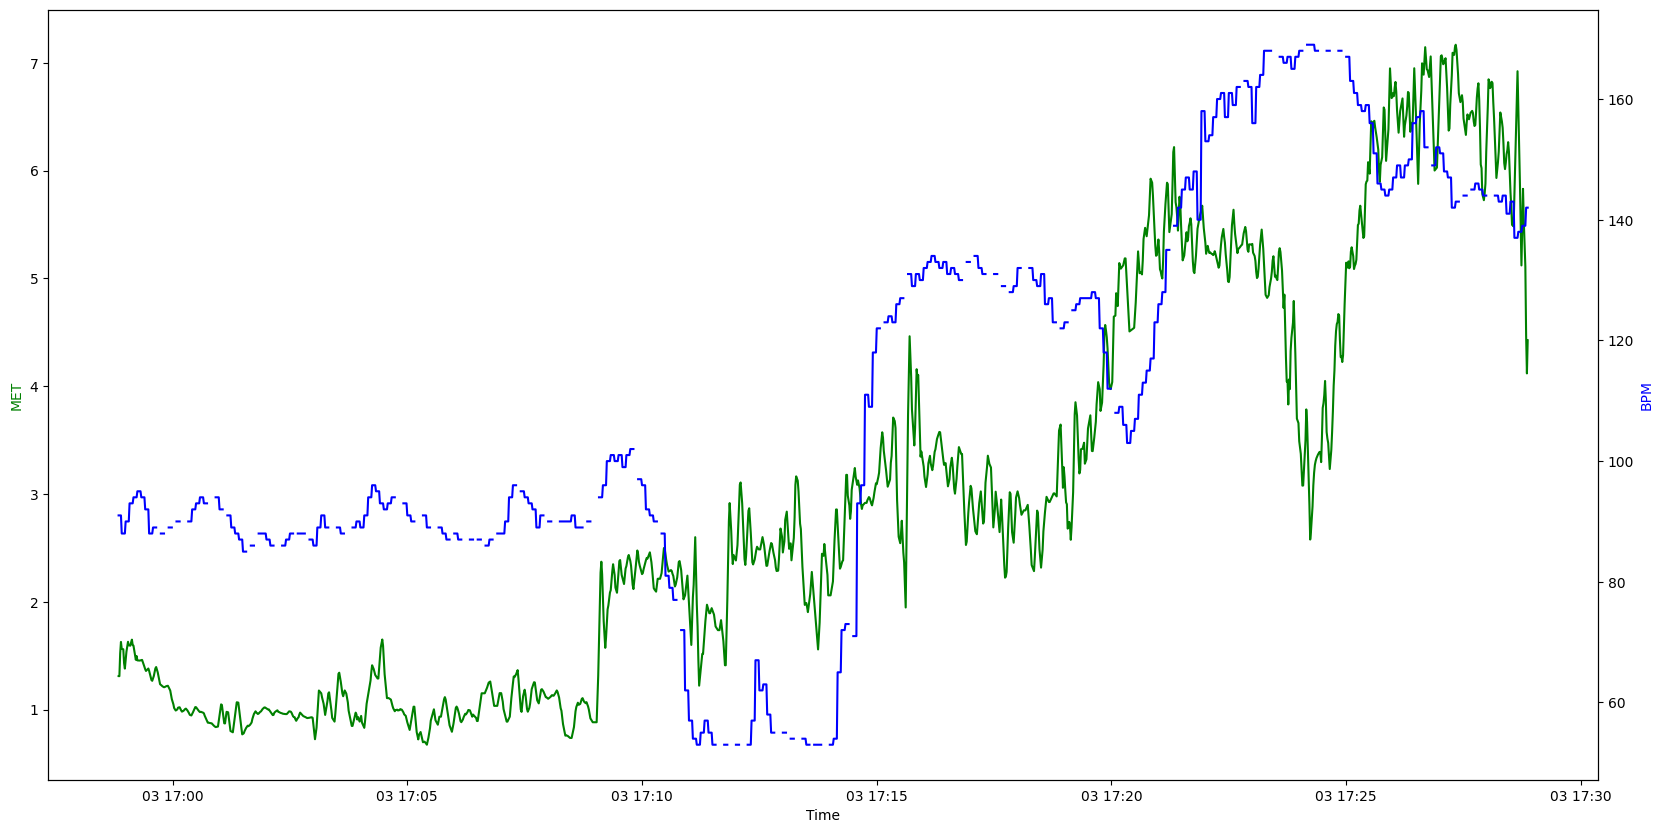

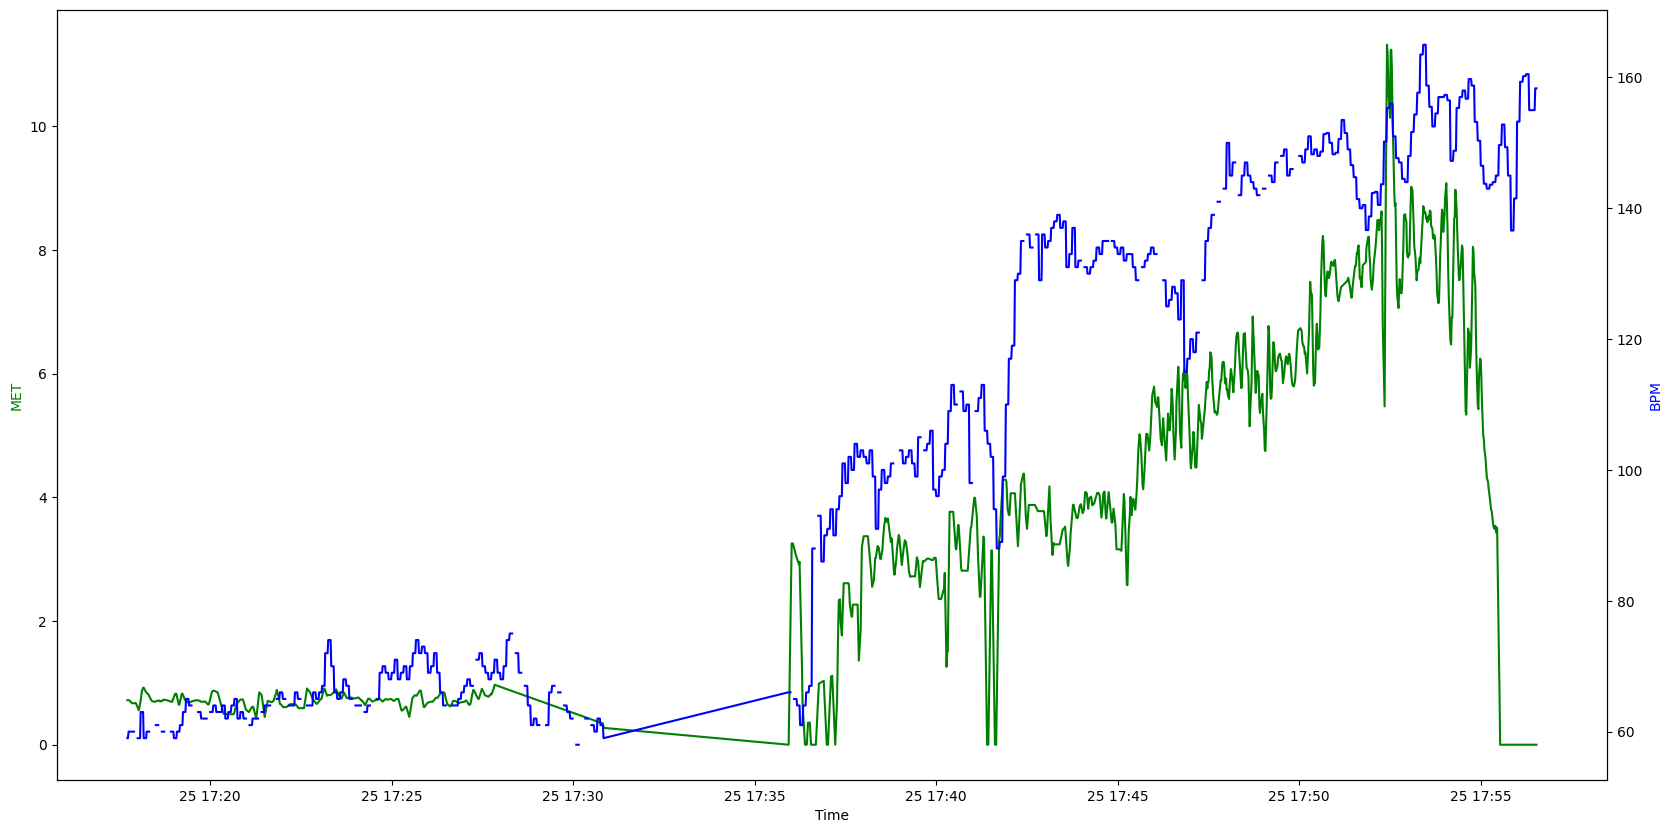

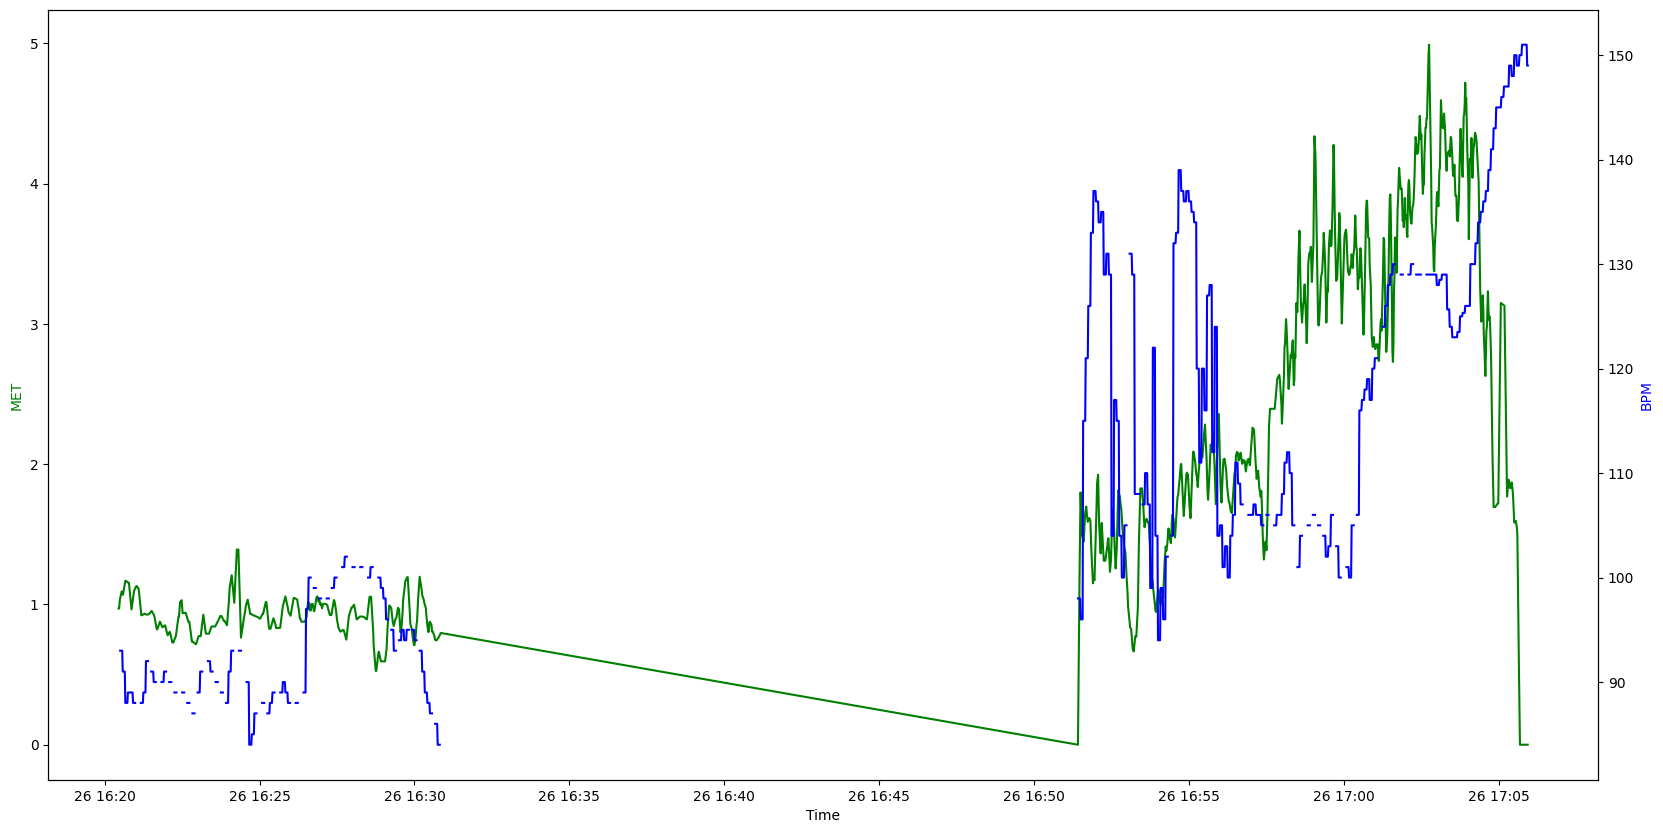

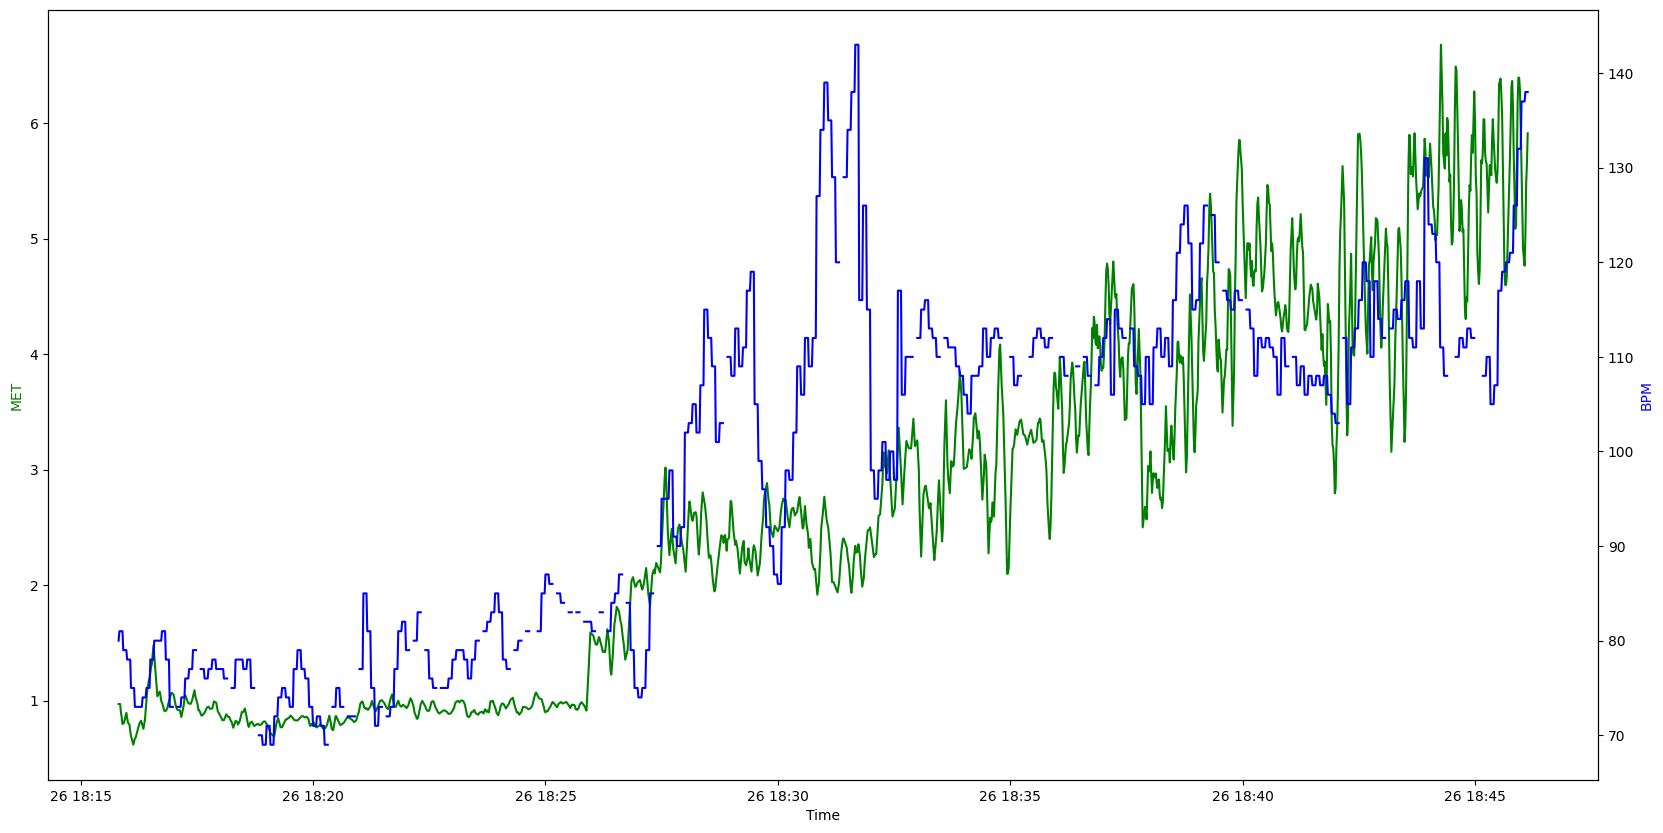

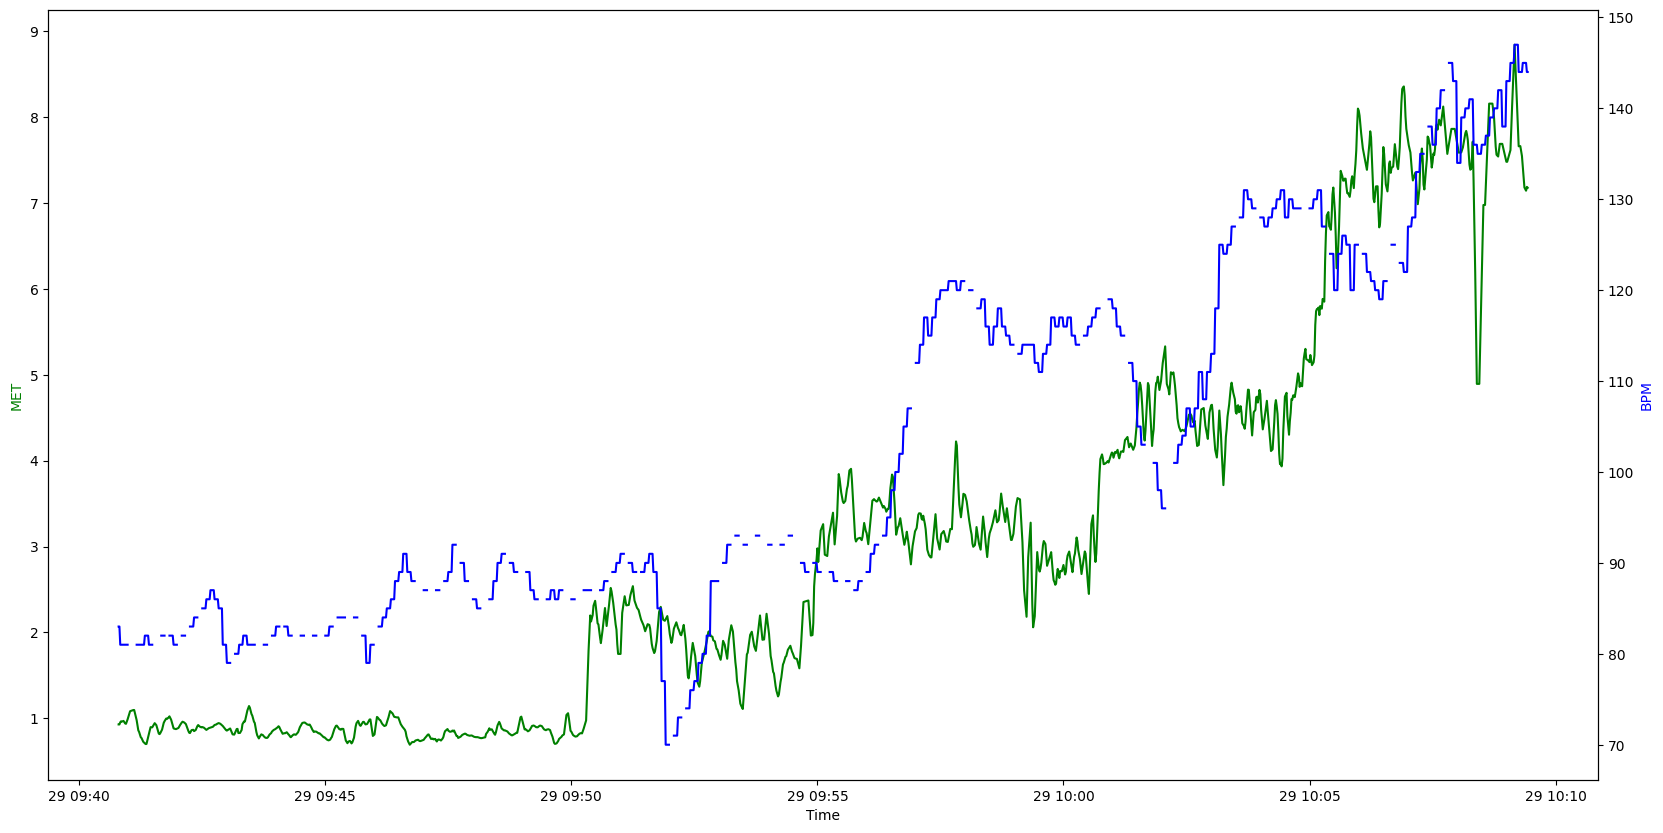

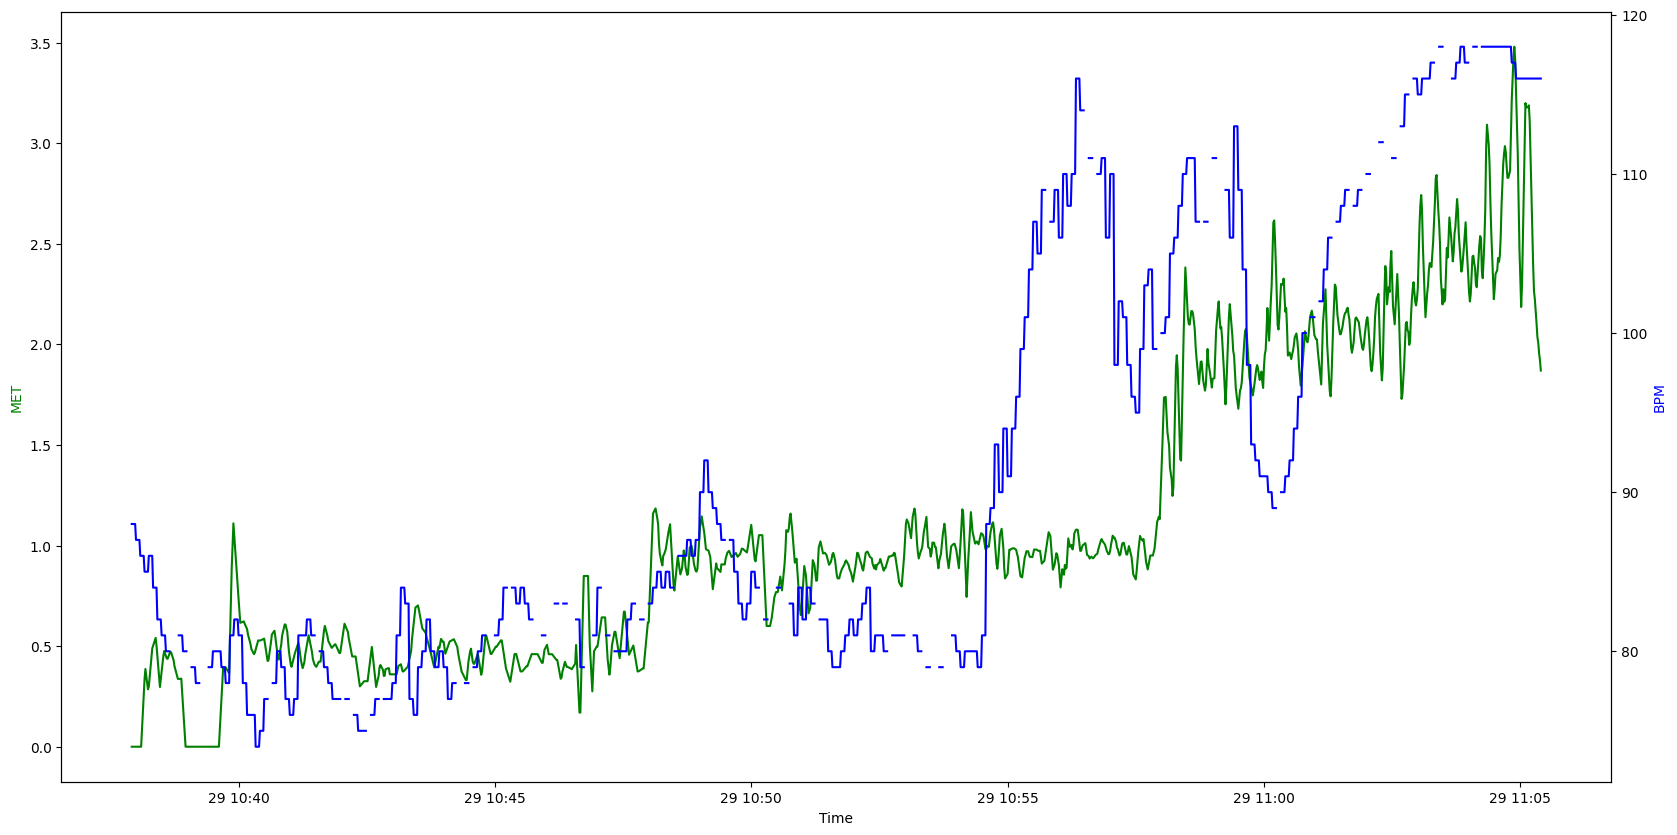

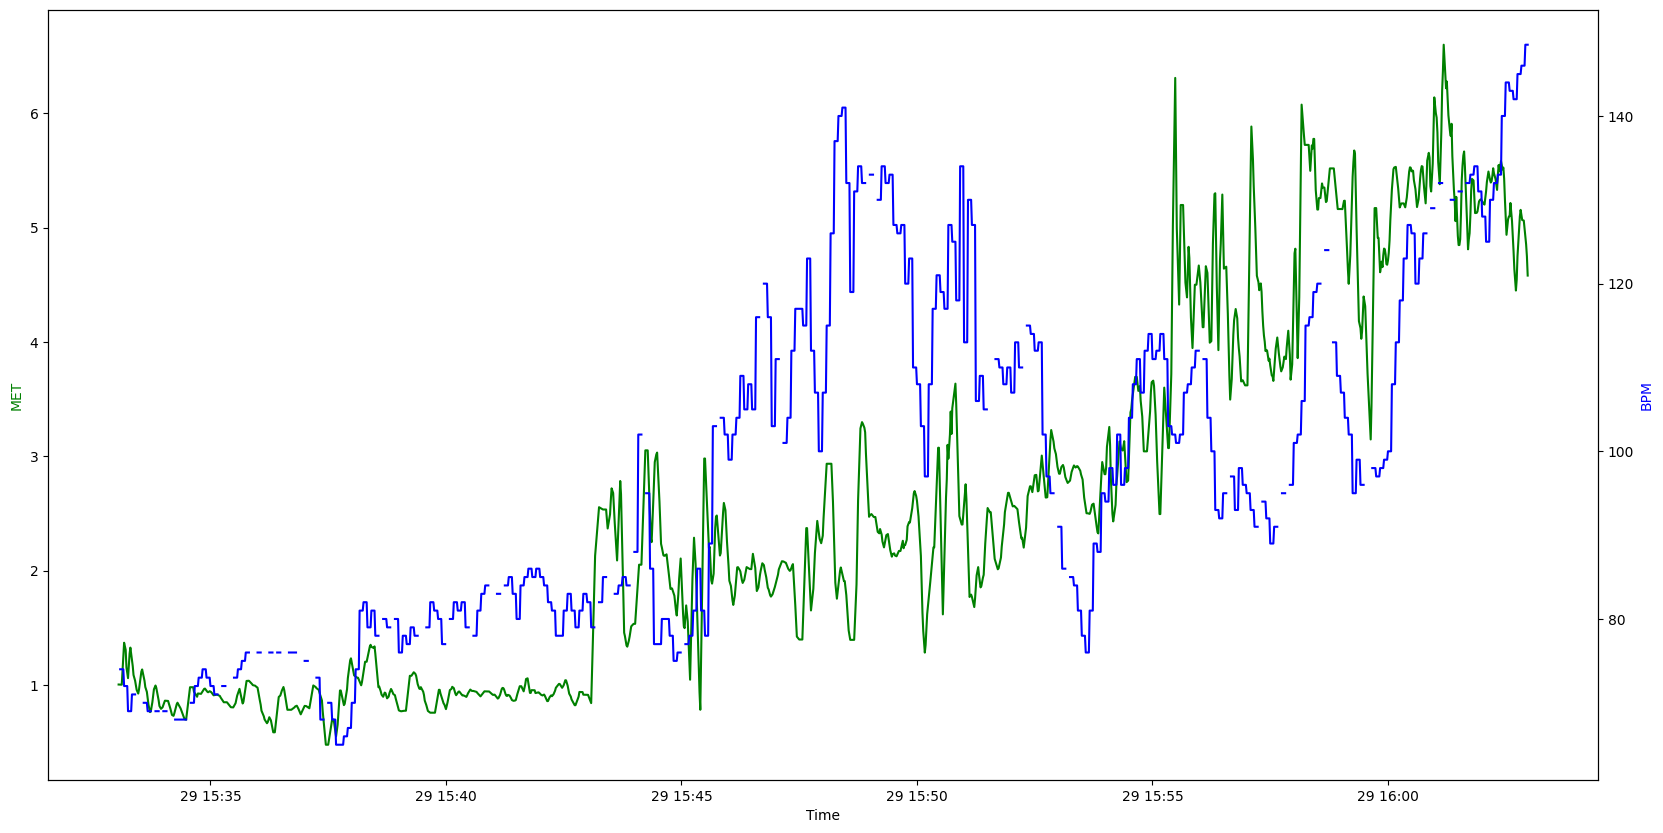

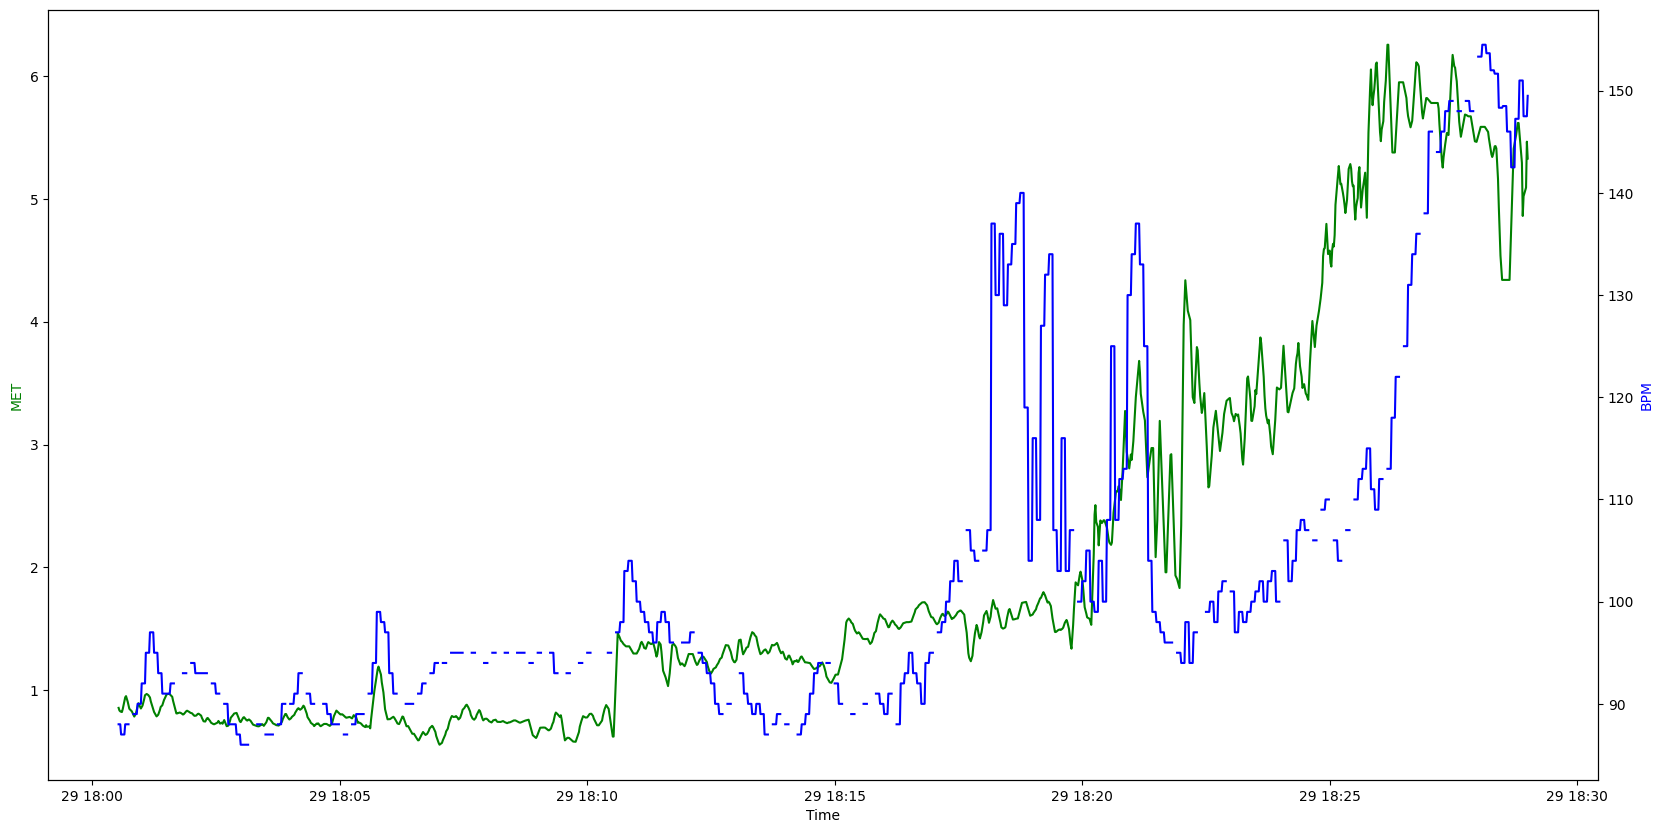

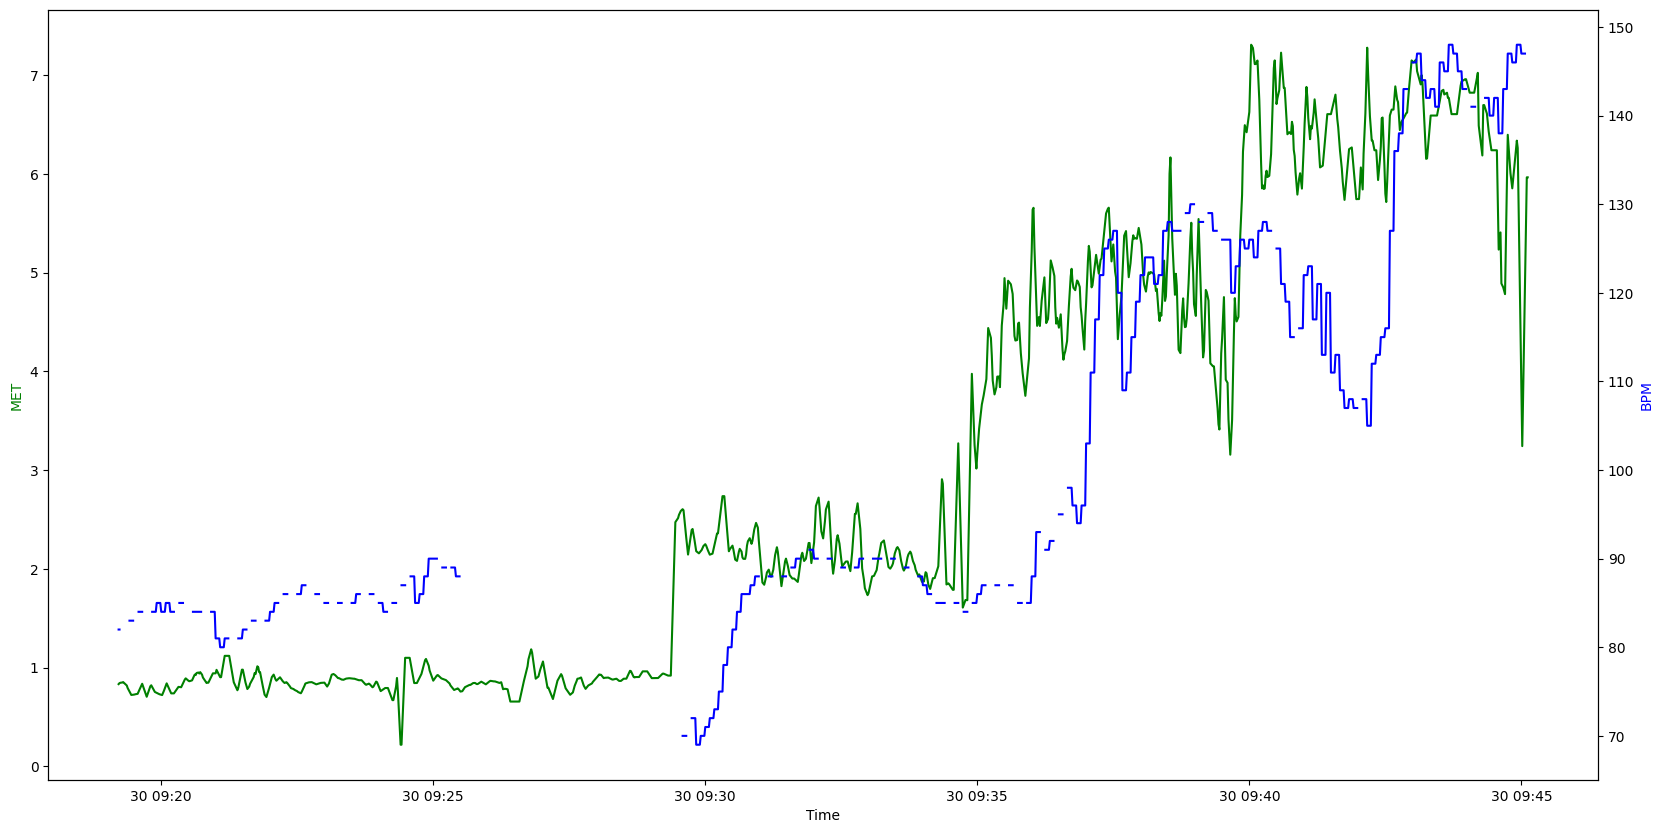

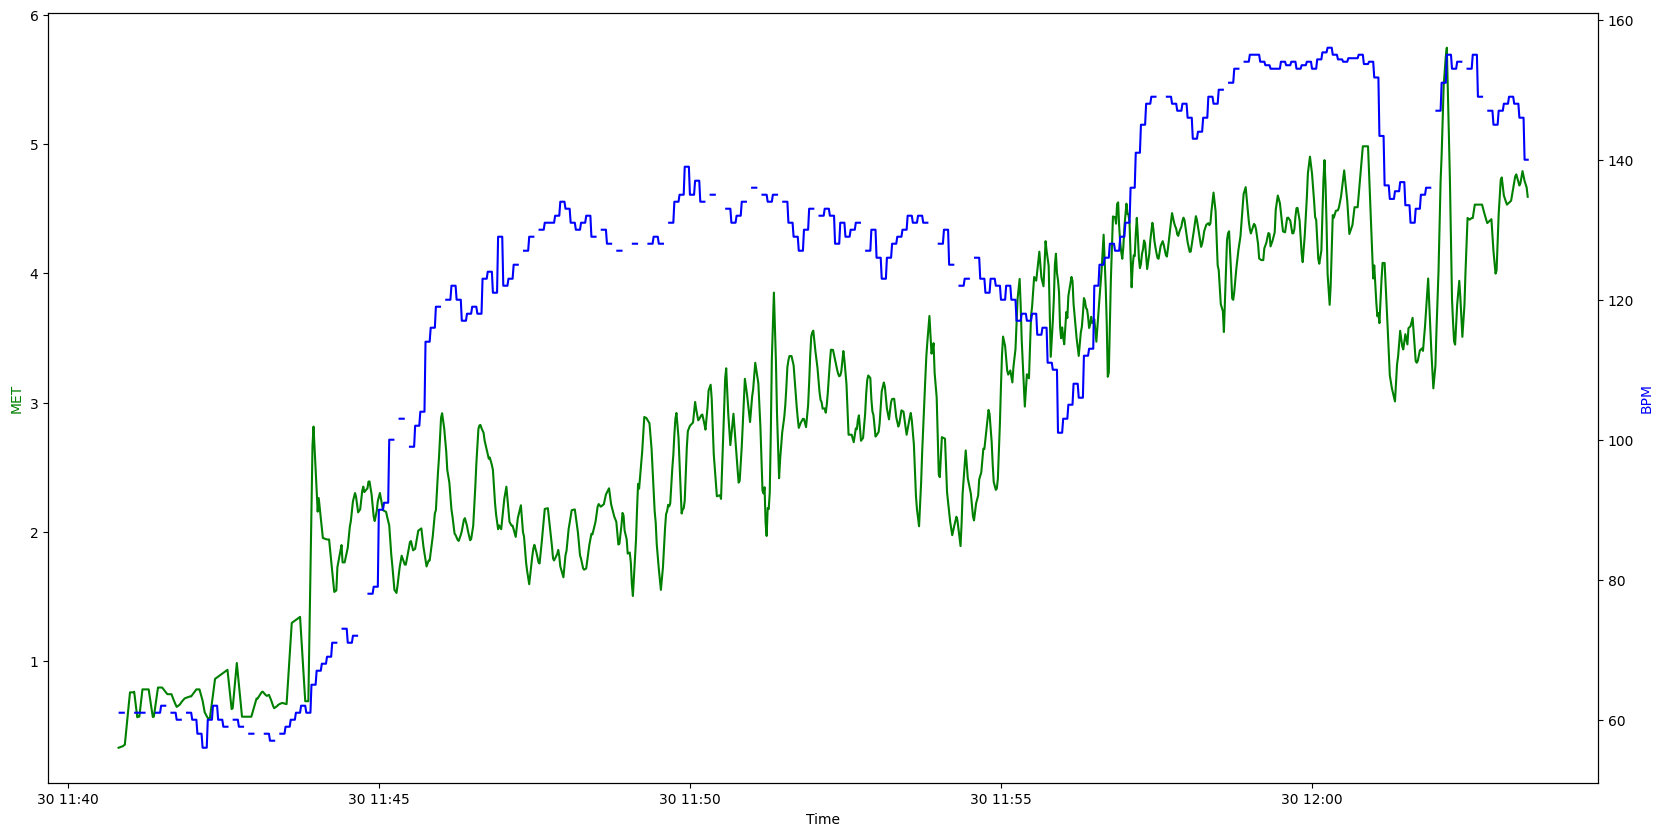

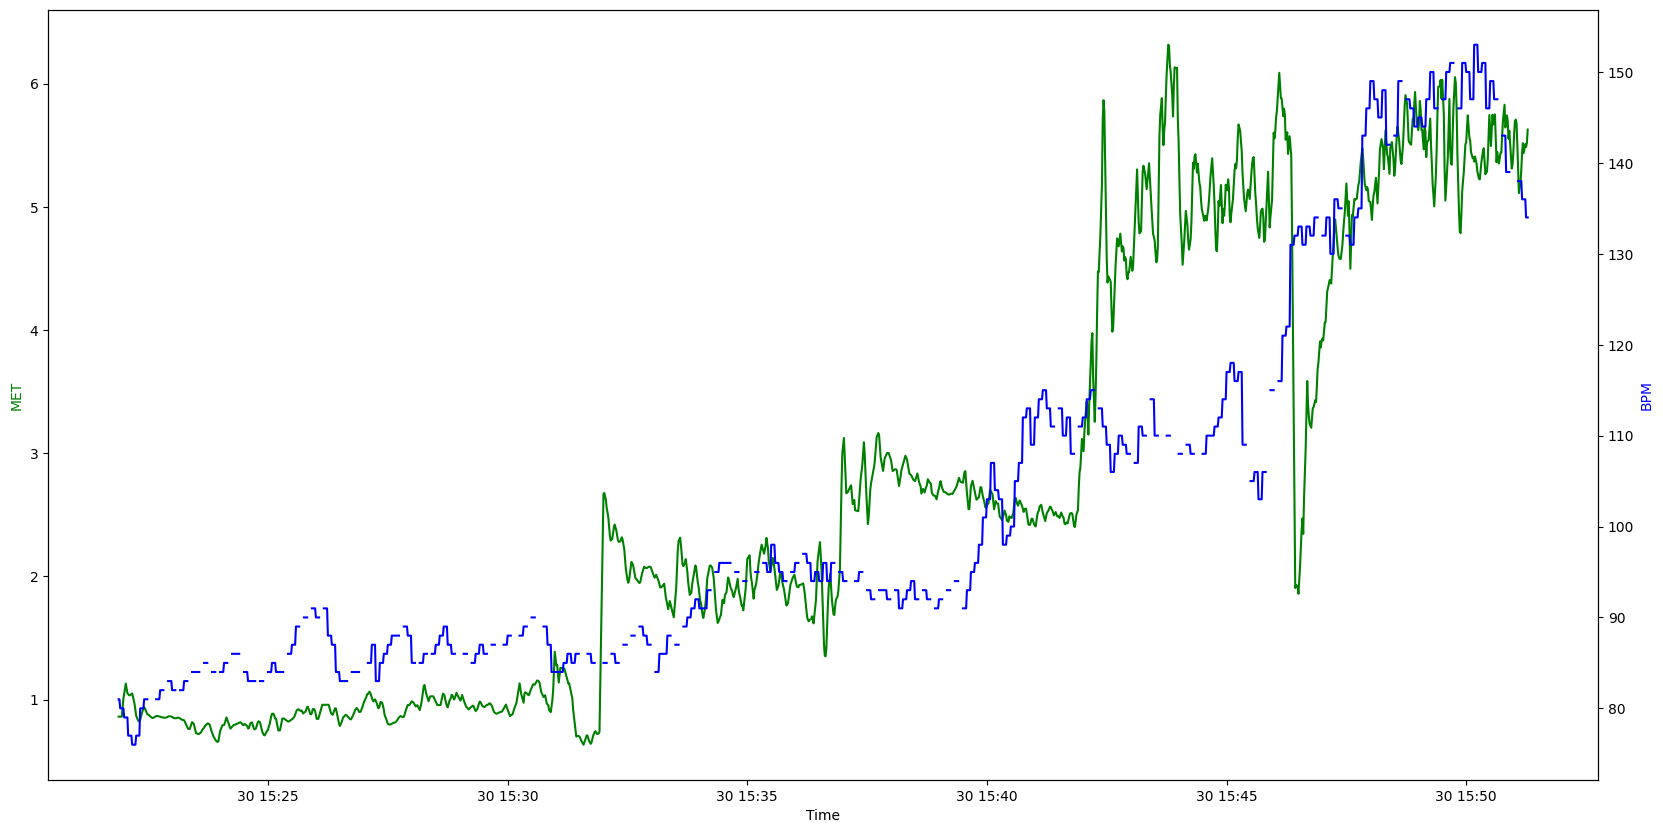

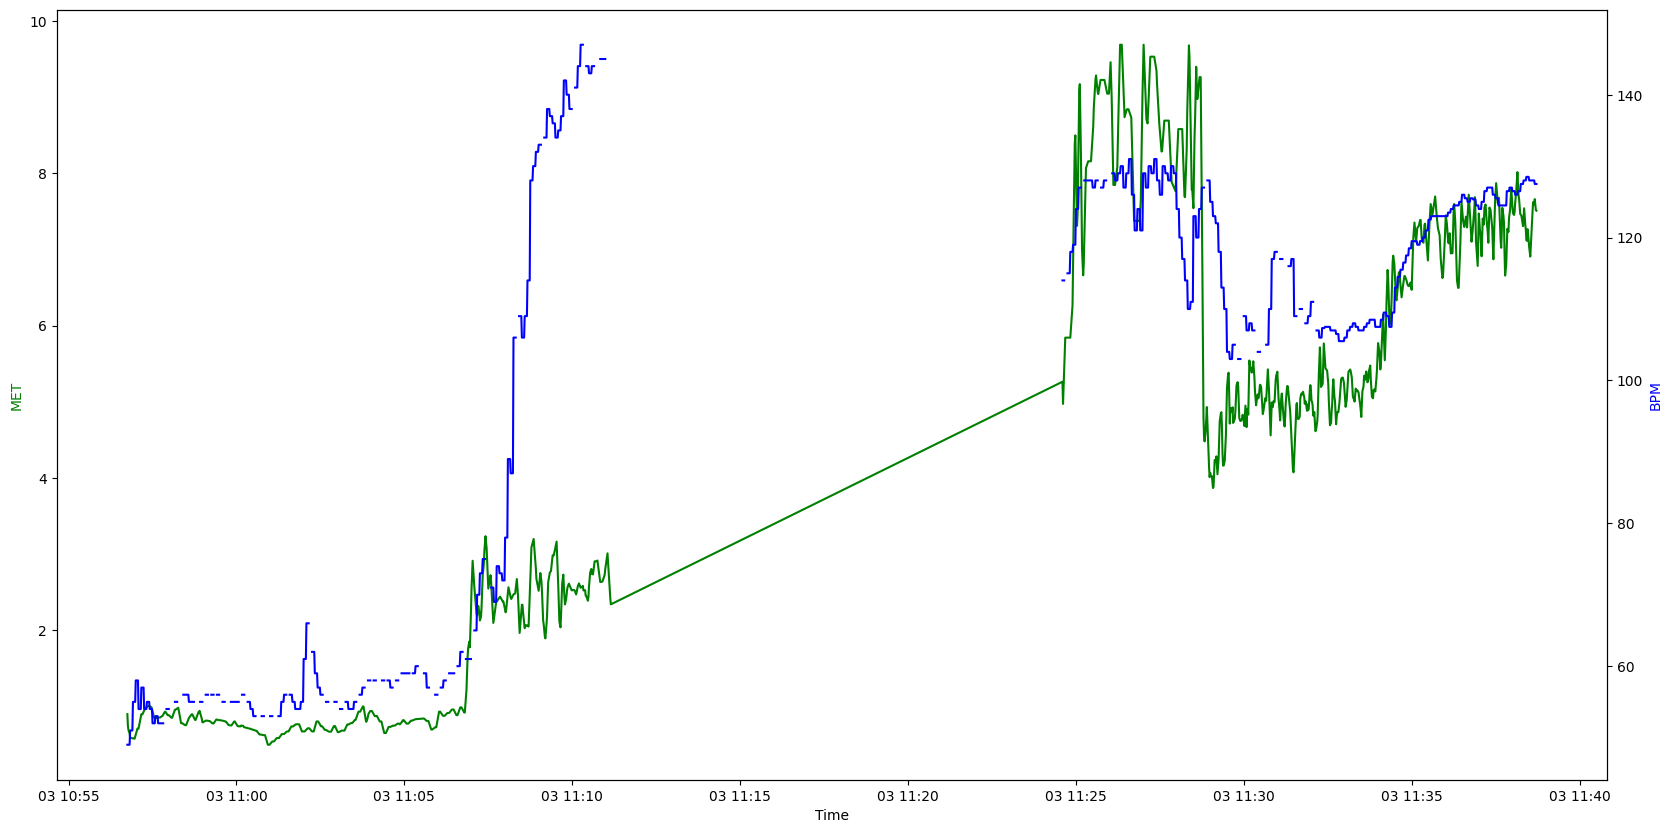

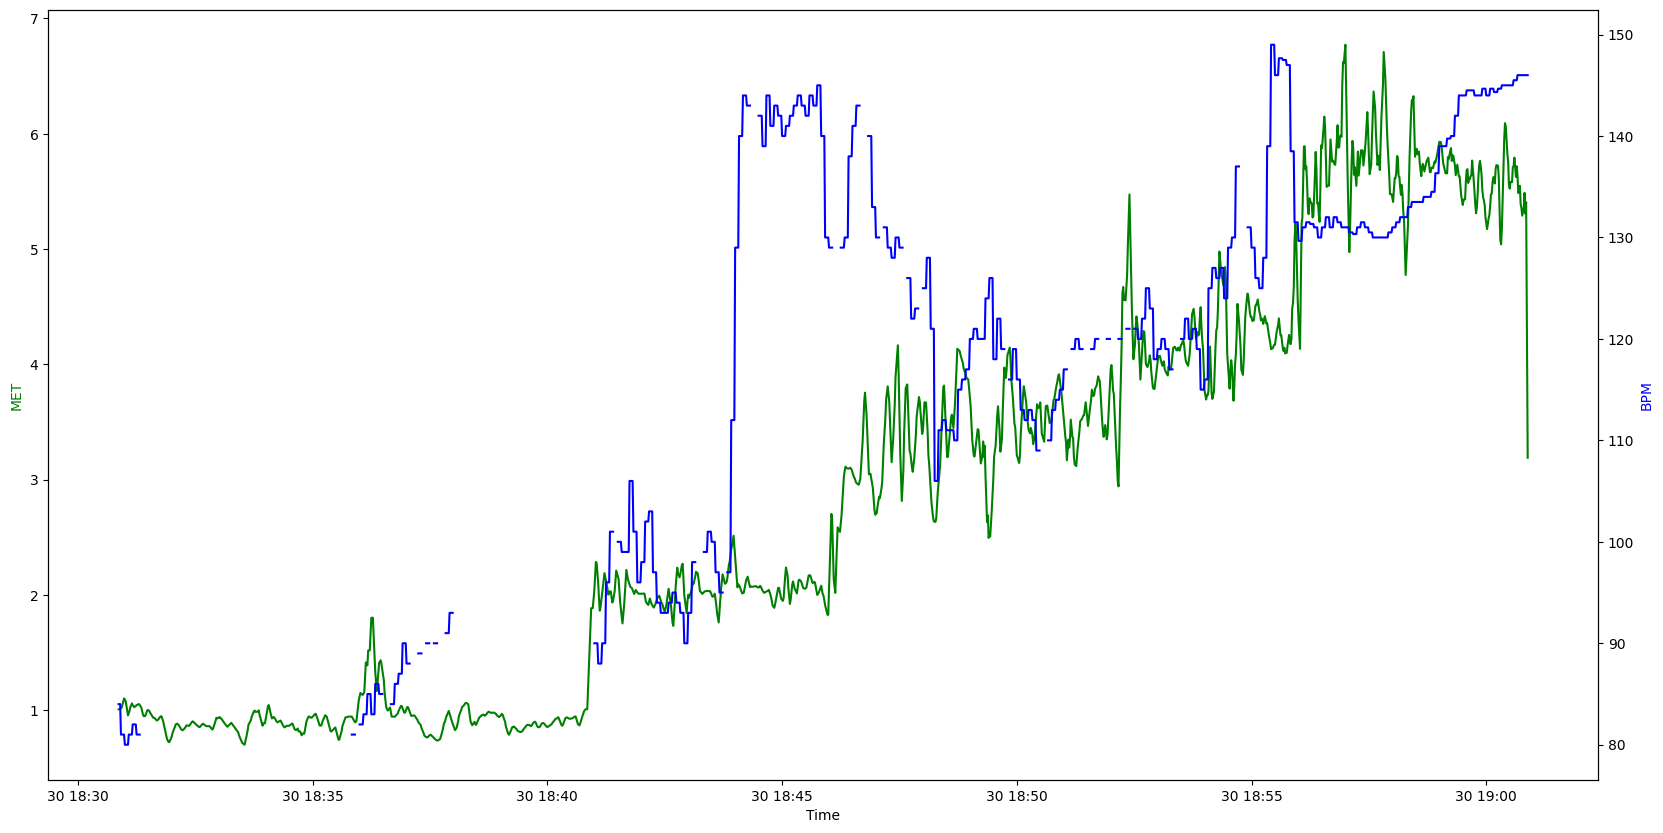

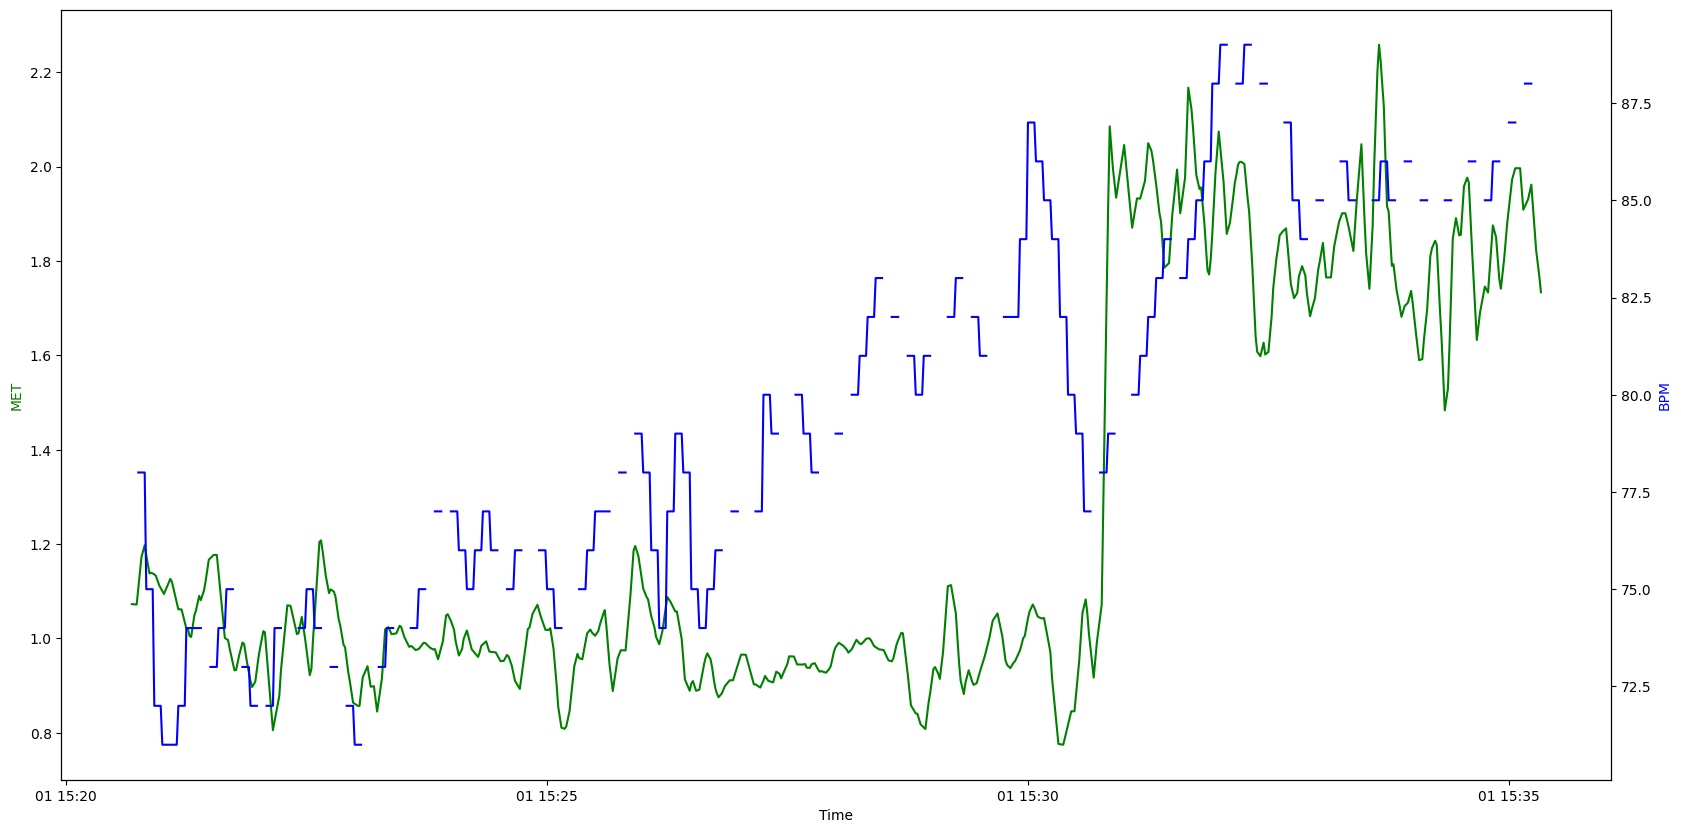

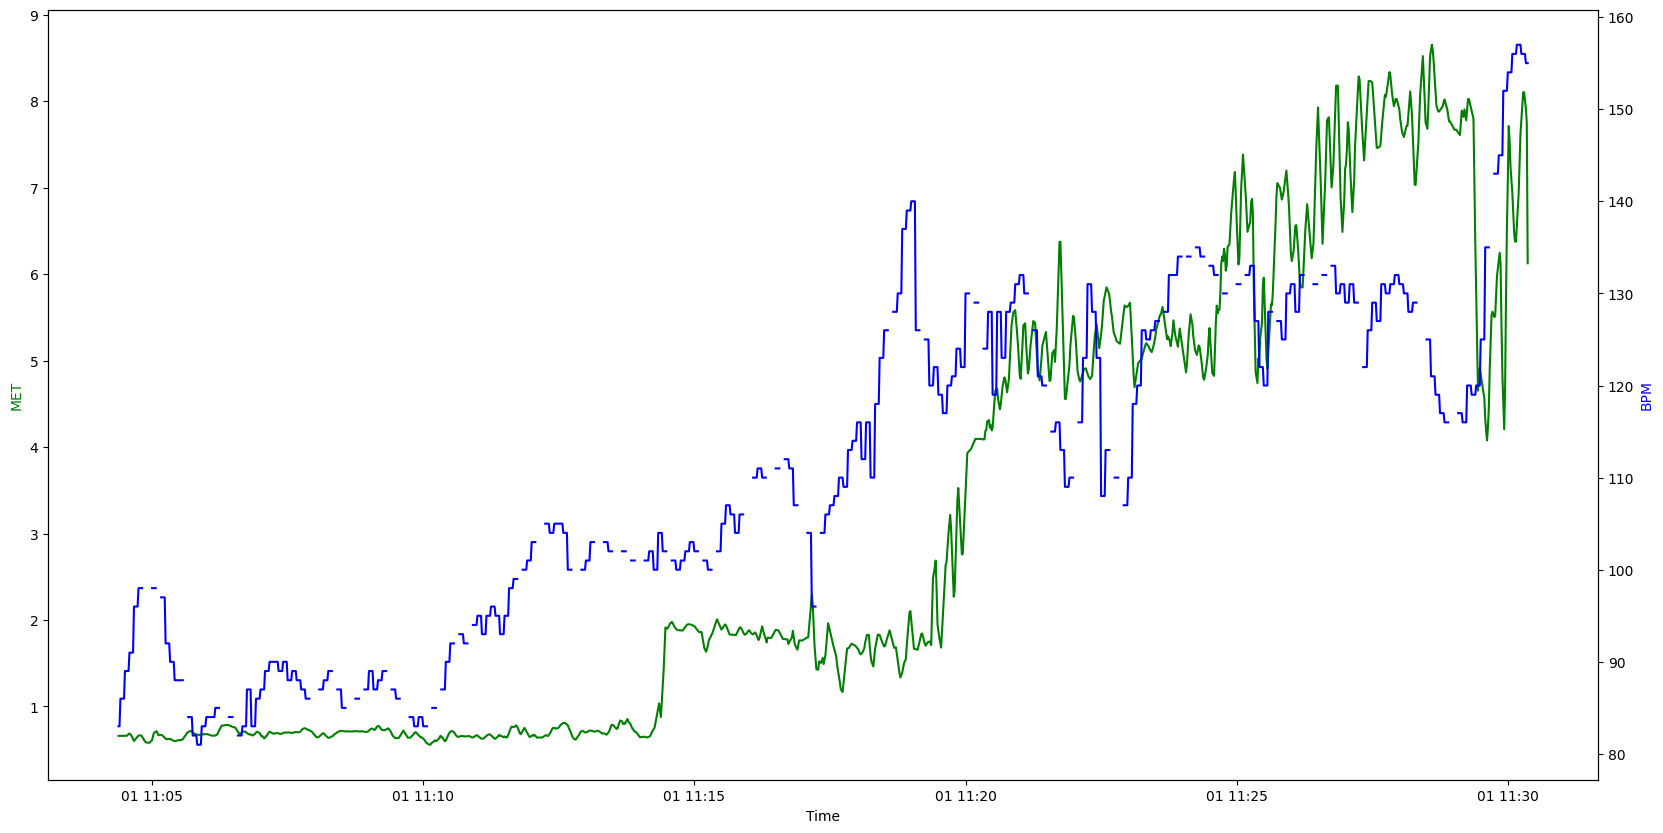

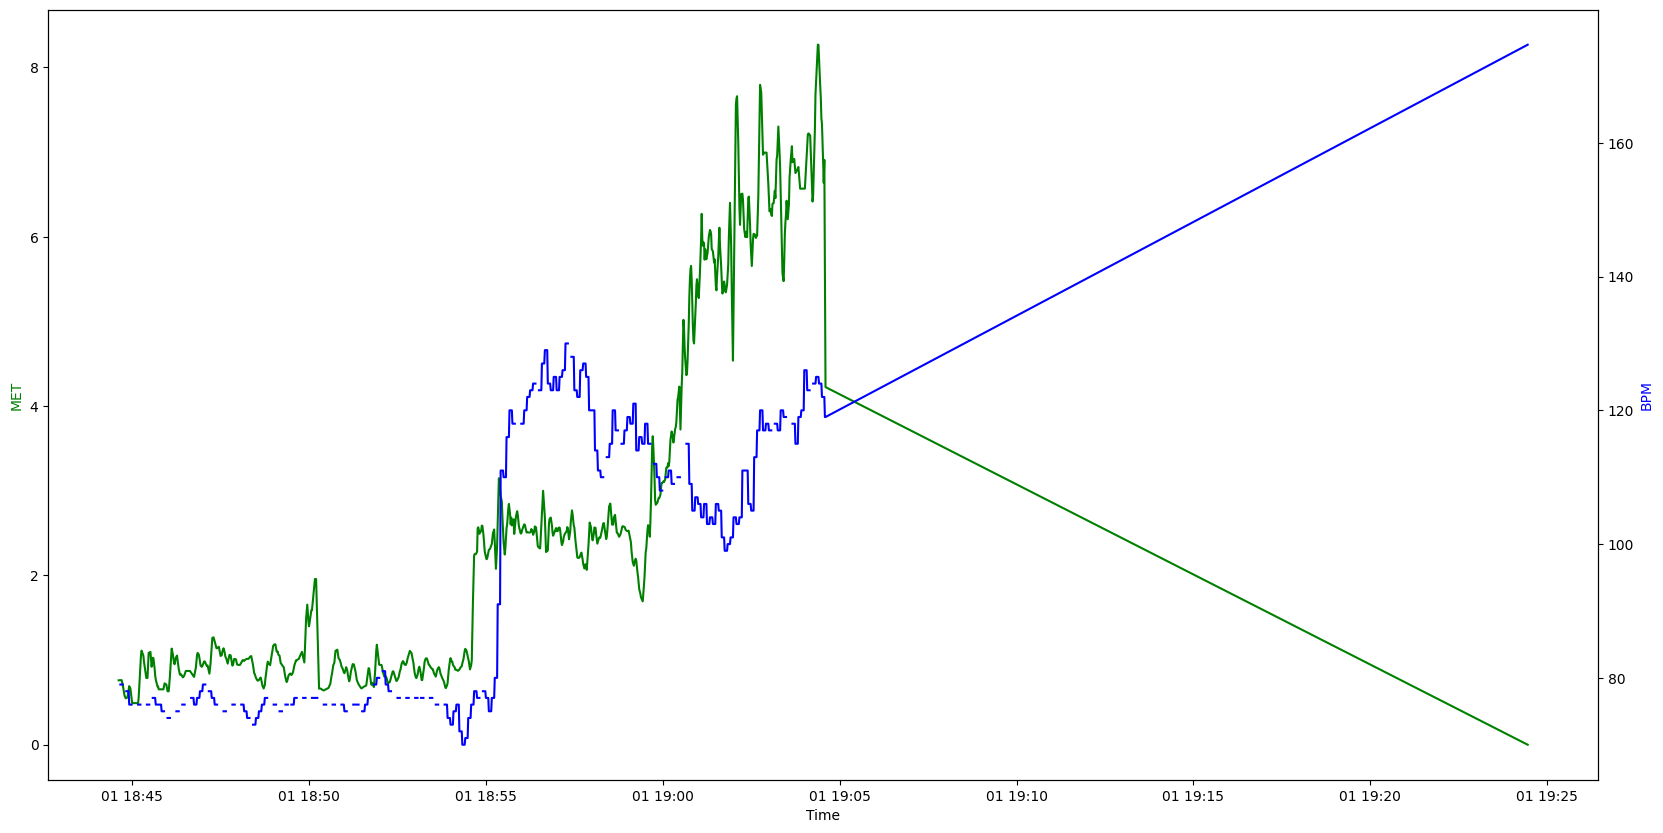

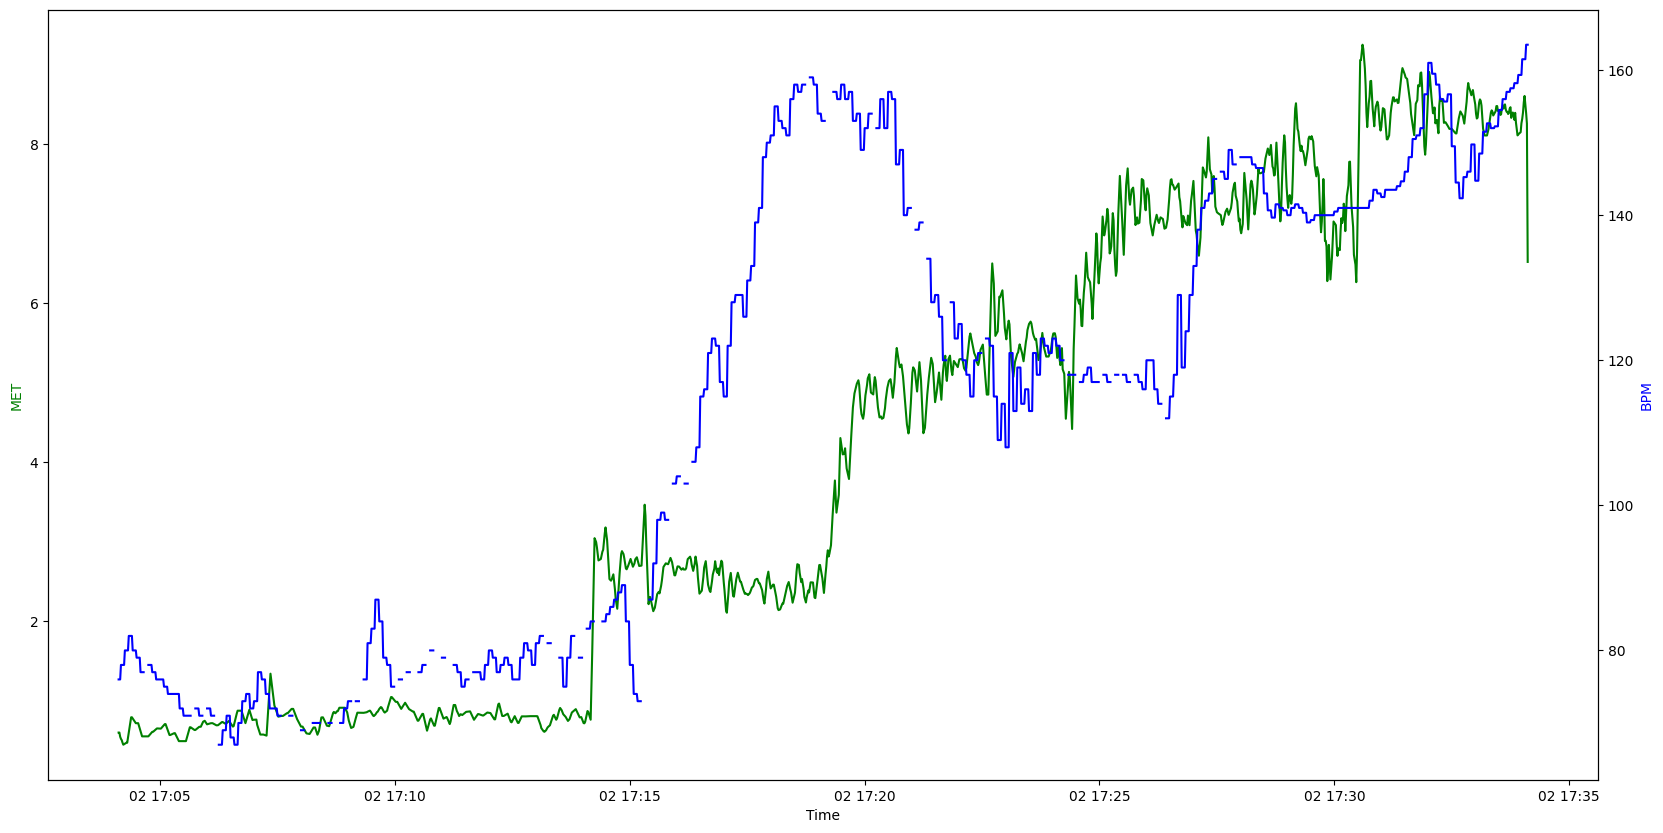

In [13]:
#add second y axis on right side for value_bpm
for df in fitbit_merged_df_list:
    fig, ax1 = plt.subplots(figsize=(20, 10))
    ax2 = ax1.twinx()
    ax1.plot(df.index, df["MET"], 'g-')
    ax2.plot(df.index, df["value__bpm"], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('MET', color='g')
    ax2.set_ylabel('BPM', color='b')
    plt.show()
    # break
# fitbit_merged_df_list[0].plot(y=["MET","value__bpm"], figsize=(20, 10))

In [36]:
fitbit_merged_df_list[0].notna().sum()

Time[s]              1802
Delta_Time           1802
MET                  1802
value__bpm            277
value__confidence     277
dtype: int64